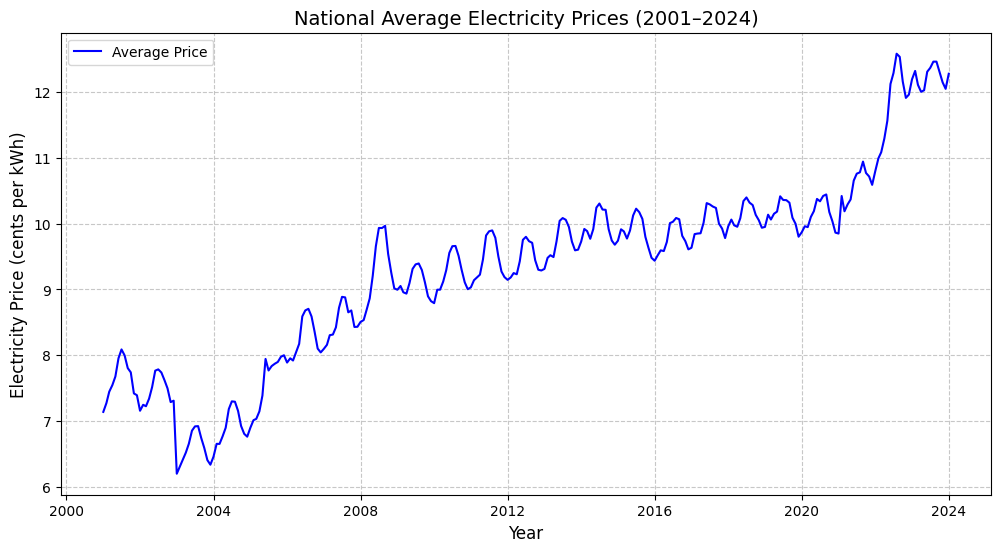

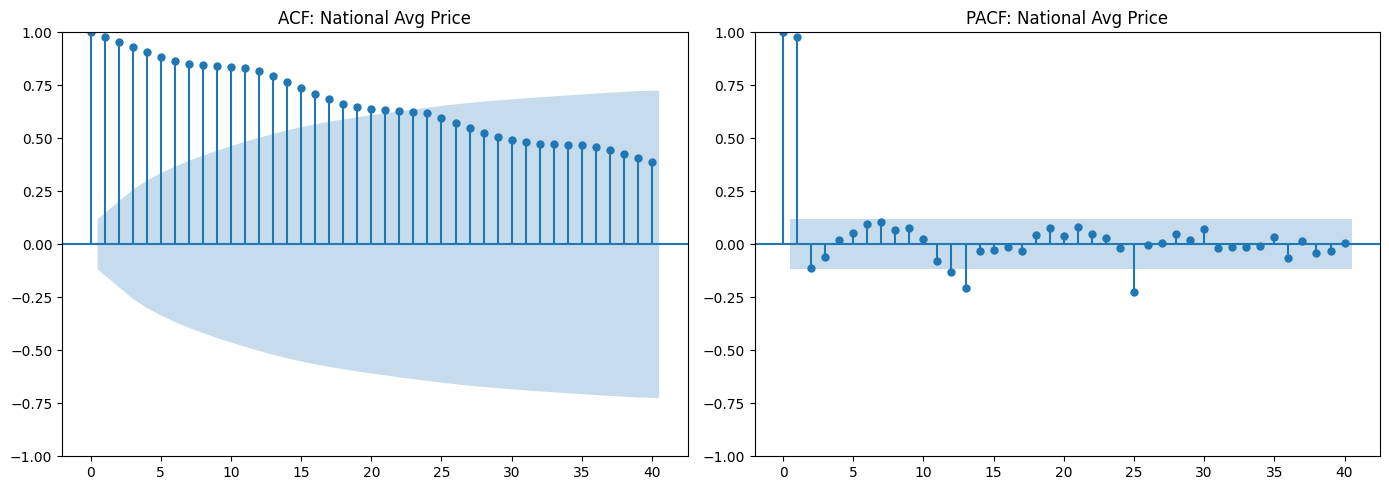

ADF Test Results:
ADF Statistic: -0.7041099663117592
p-value: 0.8456820897741519
Critical Values: {'1%': -3.455365238788105, '5%': -2.8725510317187024, '10%': -2.5726375763314966}


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Load the dataset
file_url = 'https://raw.githubusercontent.com/hnngocvo/STATS-207-Final-Project/refs/heads/main/clean_data.csv?token=GHSAT0AAAAAAC3HY4YYBRJMPWV373XDP4EAZ2ODT4A'
electricity_data = pd.read_csv(file_url)

# Aggregate the data: compute the monthly average electricity price at the national level
electricity_data['date'] = pd.to_datetime(
    electricity_data[['year', 'month']].assign(day=1)
)  # Create a date column for time series analysis

# Calculate the monthly average price
national_avg_price = electricity_data.groupby('date')['price'].mean().reset_index()

# Plot the time series
plt.figure(figsize=(12, 6))
plt.plot(national_avg_price['date'], national_avg_price['price'], label='Average Price', color='blue')
plt.title('National Average Electricity Prices (2001–2024)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Electricity Price (cents per kWh)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()

# Perform the Augmented Dickey-Fuller (ADF) test
adf_test = adfuller(national_avg_price['price'])

# Plot ACF and PACF
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
plot_acf(national_avg_price['price'], lags=40, ax=axes[0], title="ACF: National Avg Price")
plot_pacf(national_avg_price['price'], lags=40, ax=axes[1], title="PACF: National Avg Price")
plt.tight_layout()
plt.show()

# Display ADF test results
adf_results = {
    "ADF Statistic": adf_test[0],
    "p-value": adf_test[1],
    "Critical Values": adf_test[4],
}
print("ADF Test Results:")
for key, value in adf_results.items():
    print(f"{key}: {value}")


### Take first differencing

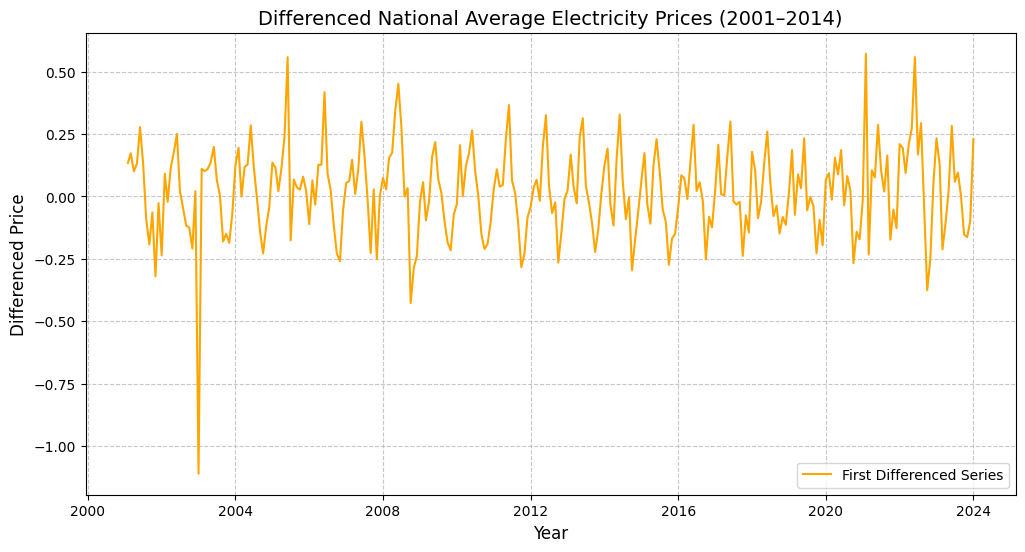

ADF Test Results after First Differencing:
ADF Statistic: -3.1301996714396836
p-value: 0.024397511624005212
Critical Values: {'1%': -3.455365238788105, '5%': -2.8725510317187024, '10%': -2.5726375763314966}


In [5]:
# Apply first differencing to the national average price
national_avg_price['price_diff'] = national_avg_price['price'].diff()

# Drop the first row (NaN due to differencing)
differenced_series = national_avg_price.dropna(subset=['price_diff'])

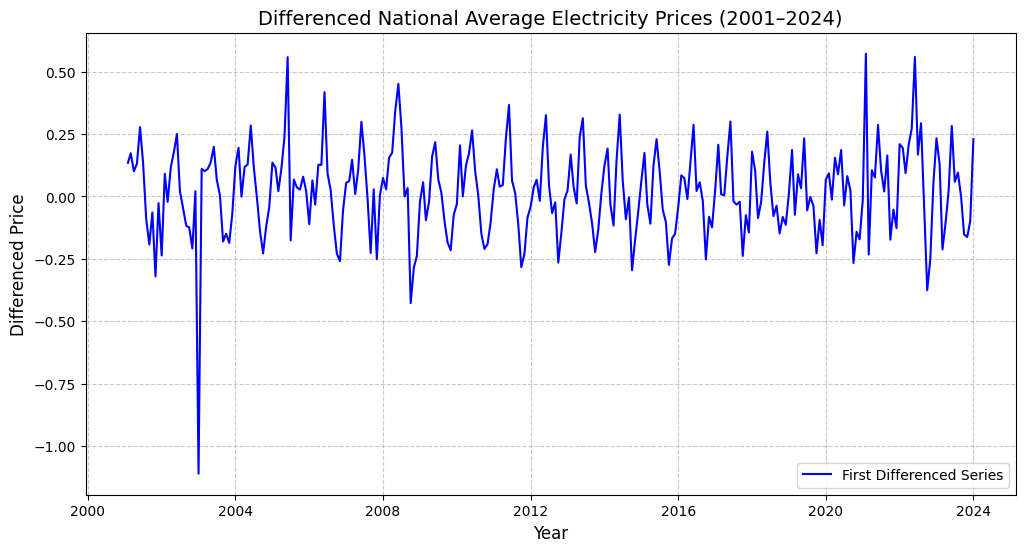

ADF Test Results after First Differencing:
ADF Statistic: -3.1301996714396836
p-value: 0.024397511624005212
Critical Values: {'1%': -3.455365238788105, '5%': -2.8725510317187024, '10%': -2.5726375763314966}


In [7]:
# Plot the differenced series
plt.figure(figsize=(12, 6))
plt.plot(differenced_series['date'], differenced_series['price_diff'], label='First Differenced Series', color='blue')
plt.title('Differenced National Average Electricity Prices (2001–2024)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Differenced Price', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()

# Recheck stationarity using the Augmented Dickey-Fuller test
adf_test_diff = adfuller(differenced_series['price_diff'])

# Display ADF test results
adf_results_diff = {
    "ADF Statistic": adf_test_diff[0],
    "p-value": adf_test_diff[1],
    "Critical Values": adf_test_diff[4],
}
print("ADF Test Results after First Differencing:")
for key, value in adf_results_diff.items():
    print(f"{key}: {value}")

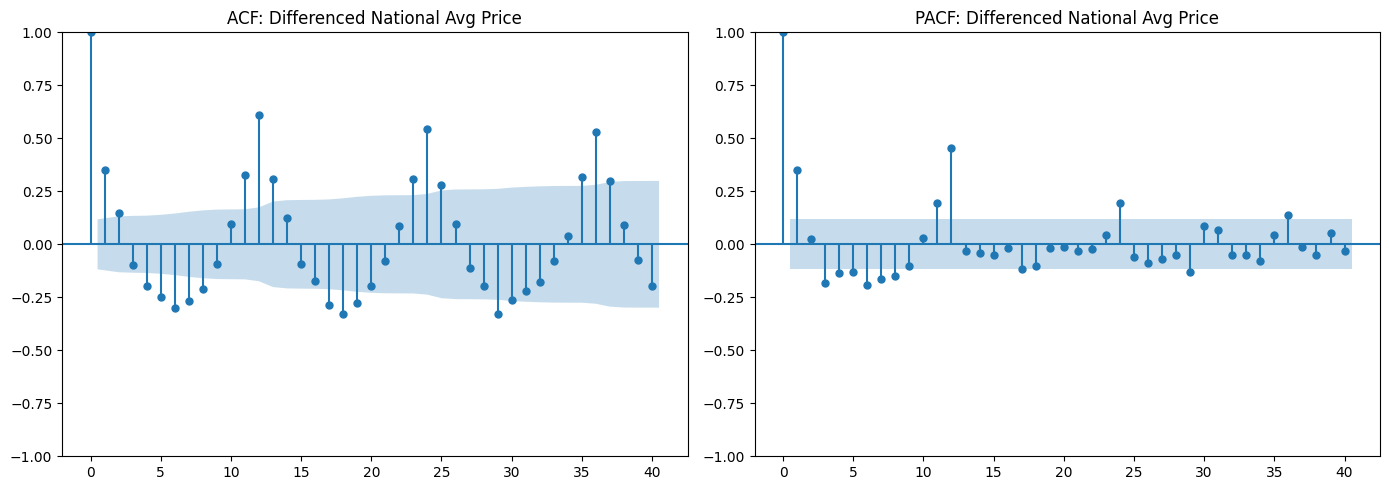

In [8]:
# Plot ACF and PACF of the differenced series
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# ACF plot
plot_acf(differenced_series['price_diff'], lags=40, ax=axes[0], title="ACF: Differenced National Avg Price")

# PACF plot
plot_pacf(differenced_series['price_diff'], lags=40, ax=axes[1], title="PACF: Differenced National Avg Price")

plt.tight_layout()
plt.show()
